In [7]:
# 1. Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
# Plot settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [9]:
# 2. Paths & Load Data
DATA_DIR = Path("./")
train_path = DATA_DIR / "../data/train.csv"
test_path = DATA_DIR / "../data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Data loaded.")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Data loaded.
Train shape: (42000, 785)
Test shape: (28000, 784)


In [10]:
# 3. Basic Info
display(train_df.head())
display(test_df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 4. Check for Missing Values
print("Missing values in training data:")
print(train_df.isnull().sum().sum())

print("Missing values in test data:")
print(test_df.isnull().sum().sum())

Missing values in training data:
0
Missing values in test data:
0


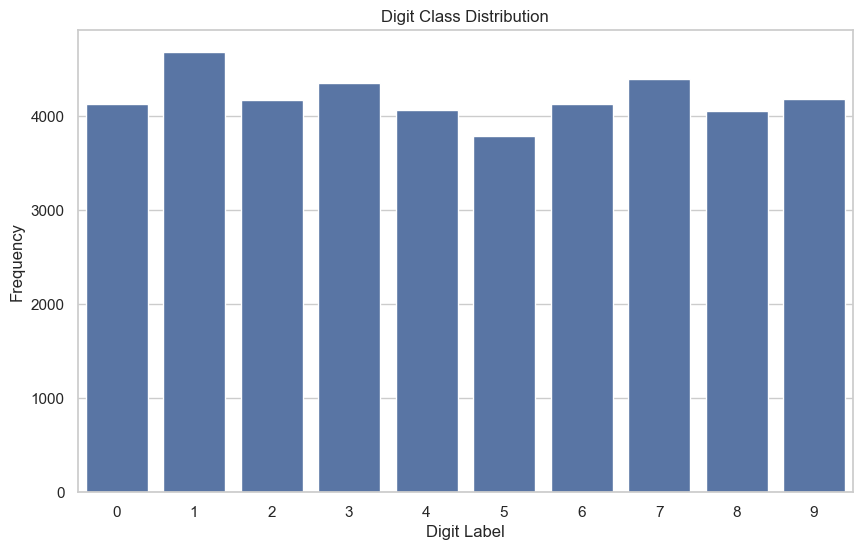

In [12]:
# 5. Target Distribution
plt.figure()
sns.countplot(x=train_df['label'])
plt.title("Digit Class Distribution")
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.show()

In [13]:
# 6. Visualize Sample Digits
def plot_digits(images, labels=None, num=12):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        title = f"Label: {labels[i]}" if labels is not None else "Unlabeled"
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

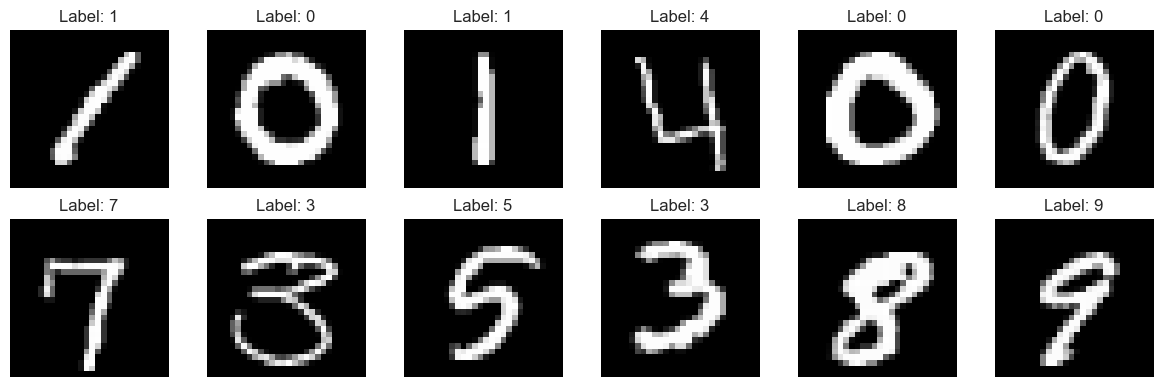

In [14]:
# Show labeled training samples
X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values

plot_digits(X_train, y_train)

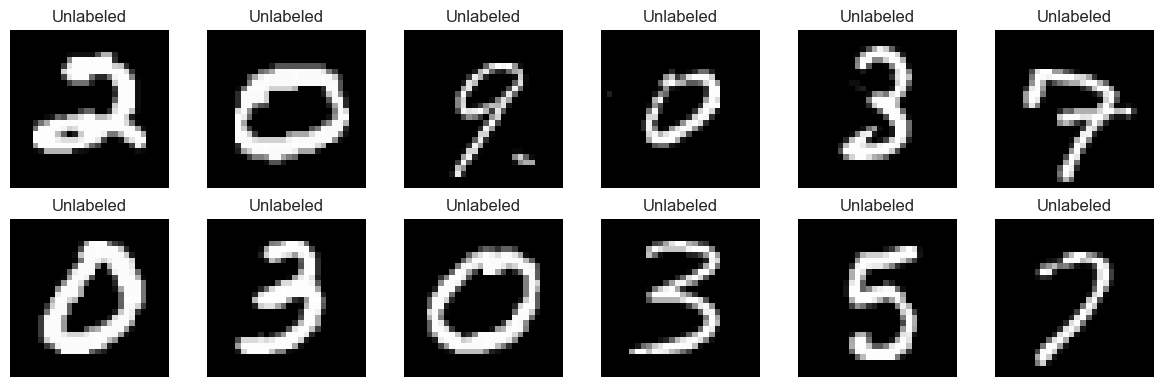

In [15]:
# Show unlabeled test samples
X_test = test_df.values
plot_digits(X_test, labels=None)

In [16]:
# 7. Pixel Value Summary
pixel_means = train_df.drop("label", axis=1).mean().mean()
pixel_max = train_df.drop("label", axis=1).max().max()
pixel_min = train_df.drop("label", axis=1).min().min()

print(f"Pixel mean: {pixel_means:.2f}")
print(f"Pixel range: {pixel_min} to {pixel_max}")

Pixel mean: 33.41
Pixel range: 0 to 255


In [17]:
# 8. Save preprocessed arrays (optional for modeling step)
np.save(DATA_DIR / "X_train.npy", X_train)
np.save(DATA_DIR / "y_train.npy", y_train)
np.save(DATA_DIR / "X_test.npy", X_test)